# "User-based efficiency" by Dilnaz Temirbekova
<hr>

## Table of Contents

* [1 Exploratary Data Analysis](#chapter1)
    * [1.1 Data Understanding](#section_1_1)
    * [1.2 Data Collection ](#section_1_2)
* [2 Data Preparation](#chapter2)
    * [2.1 Data Cleaning](#section_2_1)
    * [2.2 Data Statistics](#section_2_2)
* [3 Data Visualization](#chapter3)
    * [3.1 Univariate Visualizations](#section_3_1)
    * [3.2 Analysis of different genres](#section_3_2)
* [4 Data Training](#chapter4)
    * [4.1 Euclidean Distance Score](#section_4_1)
    * [4.2 Pearson Correlation Score](#section_4_2)
    * [4.3 Getting result based on Pearson Score](#section_4_3)
    * [4.4 Getting Recommendation](#section_4_4)
---

## 0 About the Dataset

The dataset is parsed data from the website http://movielens.org and describes 5-star rating and free-text tagging activity. It contains in total over 20k rows across 7 variables such as movieid, userid, rating, timestamp, title, genres, tag


## 1 Exploratory Data Analysis <a class="anchor" id="chapter1"></a>

### 1.1 Data Understanding <a class="anchor" id="section_1_1"></a>


**Exhibit 1: Variable Description** <a class="anchor" id="exhibit1"></a>
* **movieid** - movie id as integer from 1
* **title** - movie title and year of production
* **genres** - genre of the movie
* **userid** - userid
* **rating** - movie rating by user
* **tag** - movie tags
* **timestamp** - just timestamp

We can classify the various data columns into numerical/categorical attributes:<br>
1. Numerical Attributes: movieid, userid, rating, timestamp <br>
2. Categorical Attributes: title, genres, tag

<hr>

### 1.2 Data Collection  <a class="anchor" id="section_1_2"></a>


In [1]:
import pandas as pd
movies= pd.read_csv("./data/movies.csv") 
print(movies.head())

ratings=pd.read_csv("./data/ratings.csv",usecols=['userId','movieId','rating']) 
print(ratings.head())

tags= pd.read_csv('./data/tags.csv')
print(tags.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating
0       1       31     2.5
1       1     1029     3.0
2       1     1061     3.0
3       1     1129     2.0
4       1     1172     4.0
   userId  movieId                      tag   timestamp
0      15      339  sandra 'boring' bullock  1138537770
1      15     1955                  dentist  1193435061
2      15     7478                 Cambodia  1170560997
3      15    32892 

In [2]:
print("There are", movies.shape[0], "rows, and", movies.shape[1], "columns in the movies dataset.")
print("There are", ratings.shape[0], "rows, and", ratings.shape[1], "columns in the ratings dataset.")
print("There are", tags.shape[0], "rows, and", tags.shape[1], "columns in the tags dataset.")

There are 9125 rows, and 3 columns in the movies dataset.
There are 100004 rows, and 3 columns in the ratings dataset.
There are 1296 rows, and 4 columns in the tags dataset.


In [3]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [4]:
ratings.dtypes

userId       int64
movieId      int64
rating     float64
dtype: object

In [5]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

<hr>

## 2 Data Preparation <a class="anchor" id="chapter2"></a>

Now I can perform the steps to clean the data.

### 2.1 Data Cleaning <a class="anchor" id="section_2_1"></a>

Since I am working with big data, I need to check for missing values


In [6]:
del tags['timestamp'] #unnecessary column

In [7]:
# Checking the missing values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [8]:
ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [9]:
tags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

### 2.2 Data Statistics <a class="anchor" id="section_2_2"></a>

Descriptive statistics is a good step to start exploring numeric variables. It gives us such measure as min, max, mean, standard deviation, quartiles, etc. We can interpret them to see if there are any missing values, outliers, range of values and decide how to preprocess them before feeding into our model.


In [10]:
# Descriptive stats with applying some formatting for easy reading
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(movies.describe())

         movieId
count   9,125.00
mean   31,123.29
std    40,782.63
min         1.00
25%     2,850.00
50%     6,290.00
75%    56,274.00
max   164,979.00


In [11]:
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(ratings.describe())

          userId    movieId     rating
count 100,004.00 100,004.00 100,004.00
mean      347.01  12,548.66       3.54
std       195.16  26,369.20       1.06
min         1.00       1.00       0.50
25%       182.00   1,028.00       3.00
50%       367.00   2,406.50       4.00
75%       520.00   5,418.00       4.00
max       671.00 163,949.00       5.00


In [12]:
with pd.option_context('float_format', '{:,.2f}'.format): 
    print(tags.describe())

        userId    movieId
count 1,296.00   1,296.00
mean    417.03  42,278.95
std     142.18  44,628.35
min      15.00       1.00
25%     346.00   2,988.00
50%     431.00  26,958.50
75%     547.00  72,268.25
max     663.00 164,979.00


In [13]:
#list of highest ratings
ratings[ratings.rating >= 5]

,userId,movieId,rating
21,2,17,5.0
22,2,39,5.0
29,2,150,5.0
37,2,222,5.0
44,2,265,5.0
...,...,...,...
99975,671,4306,5.0
99978,671,4886,5.0
99979,671,4896,5.0
99982,671,4993,5.0


## 3 Data Visualizations  <a class="anchor" id="chapter3"></a>


### 3.1 Univariate Visualizations   <a class="anchor" id="section_3_1"></a>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252C9F8FEE0>]],
      dtype=object)

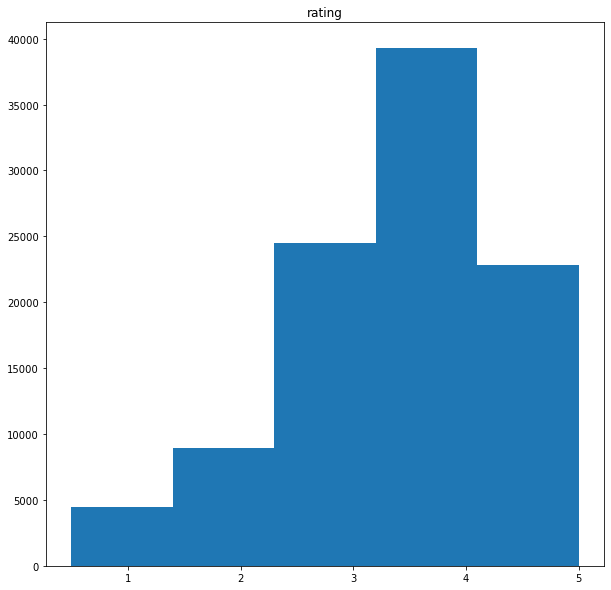

In [14]:
from matplotlib import pyplot as plt
ratings.groupby('rating')['movieId'].nunique()
%matplotlib inline
ratings.hist(column='rating',figsize=(10,10),bins=5,grid=False)

* range of rating values is from 0.5 to 5.0
* most of the movies have 4 rating

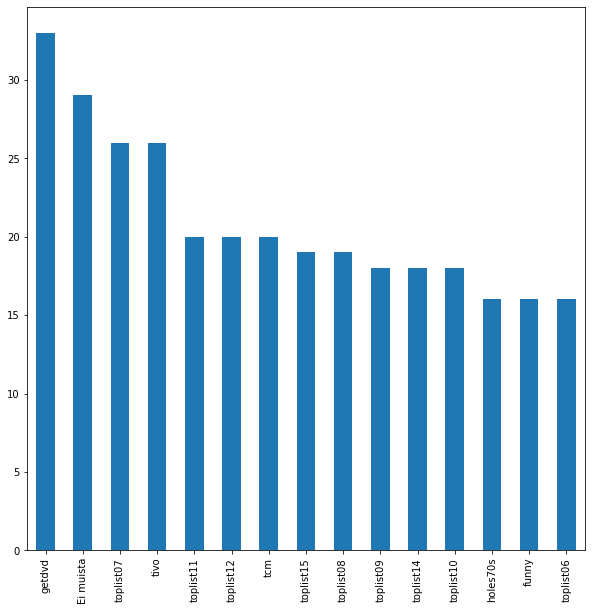

In [15]:
tag_counts = tags['tag'].value_counts()
tag_counts[:15]
tag_counts[:15].plot(kind='bar' , figsize=(10,10))

In [16]:
#number of movies
movies['movieId'].count()

9125

### 3.2  Analysis of different genres   <a class="anchor" id="section_3_2"></a>


In [17]:
# removing movies with no genre
genre_filter= (movies['genres'] == '(no genres listed)')


movies=movies[~genre_filter]
movies=movies.reset_index(drop=True)  

In [18]:
genres_count= {}
for row in range(movies['movieId'].count()):
    for genre in movies['genres'][row].split("|"):
        if(genre != ''):
            genres_count[genre]= genres_count.get(genre,0)+1
        
genres_count


{'Adventure': 1117,
 'Animation': 447,
 'Children': 583,
 'Comedy': 3315,
 'Fantasy': 654,
 'Romance': 1545,
 'Drama': 4365,
 'Action': 1545,
 'Crime': 1100,
 'Thriller': 1729,
 'Horror': 877,
 'Mystery': 543,
 'Sci-Fi': 792,
 'Documentary': 495,
 'IMAX': 153,
 'War': 367,
 'Musical': 394,
 'Western': 168,
 'Film-Noir': 133}

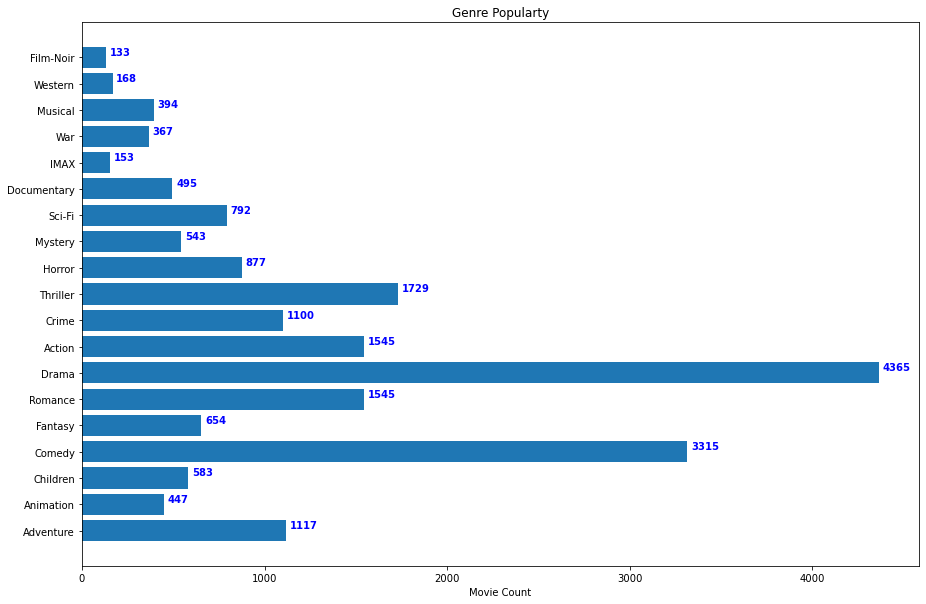

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(range(len(genres_count)),genres_count.values())
plt.yticks(range(len(genres_count)),list(genres_count.keys()))
plt.xlabel('Movie Count')
plt.title("Genre Popularty")
for i, v in enumerate(genres_count.values()):
    ax.text(v + 20, i + .10, v, color='blue', fontweight='bold')

* most popular genres are Drama & Comedy
* IMAX & Film-Noir are least popular ones

## 4 Data Training  <a class="anchor" id="chapter4"></a>
### 4.1  Euclidean Distance Score   <a class="anchor" id="section_4_1"></a>

In [20]:
from math import sqrt
import numpy as np

In [21]:
def euc_distance(person1,person2):
    df_first= ratings.loc[ratings['userId']==person1]
    df_second= ratings.loc[ratings.userId==person2]
    df= pd.merge(df_first,df_second,how='inner',on='movieId')
    if(len(df)==0): return 0
    sum_of_squares=sum(pow((df['rating_x']-df['rating_y']),2))
    return 1/(1+sum_of_squares)
    
euc_distance(1,1)

1.0

### 4.2  Pearson Correlation Score   <a class="anchor" id="section_4_2"></a>

In [22]:
def p_score(person1,person2):
    df_first= ratings.loc[ratings.userId==person1]
    df_second= ratings.loc[ratings.userId==person2]
    df= pd.merge(df_first,df_second,how='inner',on='movieId')
    n=len(df)
    if n==0: return 0
    sum1=sum(df['rating_x'])
    sum2=sum(df['rating_y'])
    sum1_square= sum(pow(df['rating_x'],2))
    sum2_square= sum(pow(df['rating_y'],2))
    product_sum= sum(df['rating_x']*df['rating_y'])
    numerator= product_sum - (sum1*sum2/n)
    denominator=sqrt((sum1_square- pow(sum1,2)/n) * (sum2_square - pow(sum2,2)/n))
    if denominator==0: return 0
    r=numerator/denominator
    return r

p_score(1,1)

1.0

### 4.3  Getting result based on Pearson Score   <a class="anchor" id="section_4_3"></a>

In [26]:
#you will need to wait till this function compiles
#on my laptop with 8gb ram it took ~1.5-2hours
def top_match(personId,n=5,similarity=pearson_score):
    scores=[(similarity(personId,other),other) for other in ratings.loc[ratings['userId']!=personId]['userId']]
    scores.sort()
    scores.reverse()
    return scores[0:n]
#example: getting 3 most similar Users for Example 
top_match(1,n=3) 

[(1.0000000000000027, 177),
 (1.0000000000000027, 177),
 (1.0000000000000027, 177)]

### 4.4  Getting Recommendation   <a class="anchor" id="section_4_4"></a>

In [27]:
def get_rec(personId, similarity=pearson_score):
    totals,simSums= {},{}
    df_person= ratings.loc[ratings.userId==personId]
    for otherId in ratings.loc[ratings['userId']!=personId]['userId']: 
        sim=similarity(personId,otherId)
        if sim<=0: continue  
        df_other=ratings.loc[ratings.userId==otherId]
        movie=df_other[~df_other.isin(df_person).all(1)]
        for movieid,rating in (np.array(movie[['movieId','rating']])):
            totals.setdefault(movieid,0)
            totals[movieid]+=rating*sim
            simSums.setdefault(movieid,0)
            simSums[movieid]+=sim
        ranking=[(t/simSums[item],item) for item,t in totals.items()]
        ranking.sort()
        ranking.reverse()
        recommendedId=np.array([x[1] for x in ranking])
        
        return np.array(movies[movies['movieId'].isin(recommendedId)]['title'])[:20]

In [29]:
# Example 
# getRecommnedation returns 20 recommended movie for the given UserID
# userId can be ranged from 1 to 671
print(get_rec(1))
print(get_rec(671))

['GoldenEye (1995)' 'Babe (1995)'
 'Rumble in the Bronx (Hont faan kui) (1995)' 'Birdcage, The (1996)'
 'Batman Forever (1995)' 'Judge Dredd (1995)' 'Net, The (1995)'
 'Star Wars: Episode IV - A New Hope (1977)' 'Only You (1994)'
 'Pulp Fiction (1994)' 'Star Trek: Generations (1994)'
 'Clear and Present Danger (1994)' 'Forrest Gump (1994)'
 'Four Weddings and a Funeral (1994)' 'Lion King, The (1994)'
 'Mask, The (1994)' 'True Lies (1994)' 'Addams Family Values (1993)'
 "Carlito's Way (1993)" 'Cliffhanger (1993)']
['GoldenEye (1995)' 'Sense and Sensibility (1995)' 'Clueless (1995)'
 'Seven (a.k.a. Se7en) (1995)' 'Usual Suspects, The (1995)'
 'Mighty Aphrodite (1995)' "Mr. Holland's Opus (1995)" 'Braveheart (1995)'
 'Brothers McMullen, The (1995)' 'Apollo 13 (1995)'
 'Batman Forever (1995)' 'Crimson Tide (1995)'
 'Die Hard: With a Vengeance (1995)' 'First Knight (1995)'
 'Net, The (1995)' 'Nine Months (1995)' 'Waterworld (1995)'
 'Circle of Friends (1995)' 'Clerks (1994)' 'Disclosure (19